In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import xgboost as xgb
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/cdc_train.csv")

In [3]:
test_df= pd.read_csv('/content/cdc_ds_test.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


In [5]:
df['log_price'] = df['price'].apply(lambda x: np.log(x))

In [6]:
numeric_cols= ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [7]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [9]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm

In [10]:
features_resnet= pd.read_csv("/content/drive/MyDrive/House_Price_Project_Final/features/resnet_features_512.csv")

In [11]:
features_resnet.head()

,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,img_feat_8,img_feat_9,...,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511,id
0,0.018600,0.144798,1.311415,0.098110,0.403078,0.616295,0.909187,1.496928,1.968919,1.119215,...,0.157892,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000,9117000170
1,0.472351,0.135211,3.182259,0.246961,0.072650,0.065367,0.625350,0.898638,1.593249,2.361855,...,0.319023,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116,6700390210
2,0.420289,0.310904,1.326100,0.389269,0.651462,0.449130,0.279591,1.420183,2.154287,1.269130,...,1.525771,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635,7212660540
3,0.042957,0.426265,1.759102,0.172925,0.227874,0.401043,1.491914,0.761423,1.569707,1.308950,...,0.958589,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145,8562780200
4,0.144827,0.198062,0.813048,0.010523,0.046097,0.662091,0.856346,1.604122,1.597418,1.217113,...,0.627851,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330,7760400350


In [12]:
df_res_train= df.merge(features_resnet, on='id')

In [13]:
df_res_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,img_feat_502,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511
0,9117000170,2015-05-05,268643,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,...,0.703124,0.157892,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000
1,6700390210,2014-07-08,245000,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,...,1.275297,0.319023,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116
2,7212660540,2015-01-15,200000,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,...,0.367382,1.525771,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635
3,8562780200,2015-04-27,352499,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,...,0.794746,0.958589,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145
4,7760400350,2014-12-05,232000,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,...,0.098142,0.627851,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330


In [14]:
x_res = df_res_train.drop(['id', 'date', 'price', 'log_price'], axis=1)
y_res = df_res_train['log_price']

In [15]:
x_train_res , x_val_res, y_train_res, y_val_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


In [16]:
print(x_train_res.shape)
print(x_val_res.shape)
print(y_train_res.shape)
print(y_val_res.shape)

(13125, 530)
(3282, 530)
(13125,)
(3282,)


In [17]:
# 1. Redefine the model with early stopping inside
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50, # Move it here
    n_jobs=-1,
    random_state=42
)

# 2. Fit without the early_stopping_rounds argument
model.fit(
    x_train_res, y_train_res,
    eval_set=[(x_val_res, y_val_res)],
    verbose=False
)

# 3. Evaluate
preds = model.predict(x_val_res)
print(f"R2: {r2_score(y_val_res, preds):.4f}")
print(f"MSE: {mean_squared_error(y_val_res, preds):.4f}")





R2: 0.8904
MSE: 0.0313


**PCA**

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



visual_cols = x_train_res.columns[-512:].tolist()
x_train_visual = x_train_res[visual_cols]
x_val_visual = x_val_res[visual_cols]

# 4. Standardize and PCA
scaler = StandardScaler()

x_train_visual_scaled = scaler.fit_transform(x_train_visual.values)
x_val_visual_scaled = scaler.transform(x_val_visual.values)

pca = PCA(n_components=0.95, random_state=42)
x_train_pca = pca.fit_transform(x_train_visual_scaled)
x_val_pca = pca.transform(x_val_visual_scaled)

print(f"PCA Success! Reduced to {x_train_pca.shape[1]} components.")

PCA Success! Reduced to 265 components.


In [19]:
# Everything that is NOT in visual_cols is tabular
tabular_cols = [c for c in x_train_res.columns if c not in visual_cols]

x_train_tab = x_train_res[tabular_cols].values
x_val_tab = x_val_res[tabular_cols].values

# Stack them together
x_train_hybrid = np.hstack((x_train_tab, x_train_pca))
x_val_hybrid = np.hstack((x_val_tab, x_val_pca))

In [20]:
# Everything that is NOT in visual_cols is tabular
tabular_cols = [c for c in x_train_res.columns if c not in visual_cols]

x_train_tab = x_train_res[tabular_cols].values
x_val_tab = x_val_res[tabular_cols].values

# Stack them together
x_train_hybrid = np.hstack((x_train_tab, x_train_pca))
x_val_hybrid = np.hstack((x_val_tab, x_val_pca))

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Isolate the 512 visual features for the whole DF
visual_cols = [c for c in df_res_train.columns if c.startswith('img_feat_')]
x_visual_all = df_res_train[visual_cols].values

# 2. Scale and run PCA on everything
scaler_all = StandardScaler()
x_visual_scaled = scaler_all.fit_transform(x_visual_all)

pca_all = PCA(n_components=2, random_state=42) # Reduce to 2 for 2D visualization
pca_result = pca_all.fit_transform(x_visual_scaled)

In [22]:
# 1. Create 4 clusters based on Visual PCA results
kmeans = KMeans(n_clusters=4, random_state=42)
df_res_train['Market_Cluster'] = kmeans.fit_predict(pca_result)

# 2. Map the PCA results back to the main dataframe
df_res_train['PCA1'] = pca_result[:, 0]
df_res_train['PCA2'] = pca_result[:, 1]

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Isolate only the image features from your merged dataframe
visual_cols = [c for c in df_res_train.columns if c.startswith('img_feat_')]
x_visual_all = df_res_train[visual_cols].values

# 2. Standardize and reduce to 2 dimensions for easy visualization
scaler_all = StandardScaler()
x_scaled = scaler_all.fit_transform(x_visual_all)

pca_2d = PCA(n_components=2, random_state=42)
pca_result = pca_2d.fit_transform(x_scaled)

# 3. Add PCA results back to the main dataframe
df_res_train['Visual_PCA1'] = pca_result[:, 0]
df_res_train['Visual_PCA2'] = pca_result[:, 1]

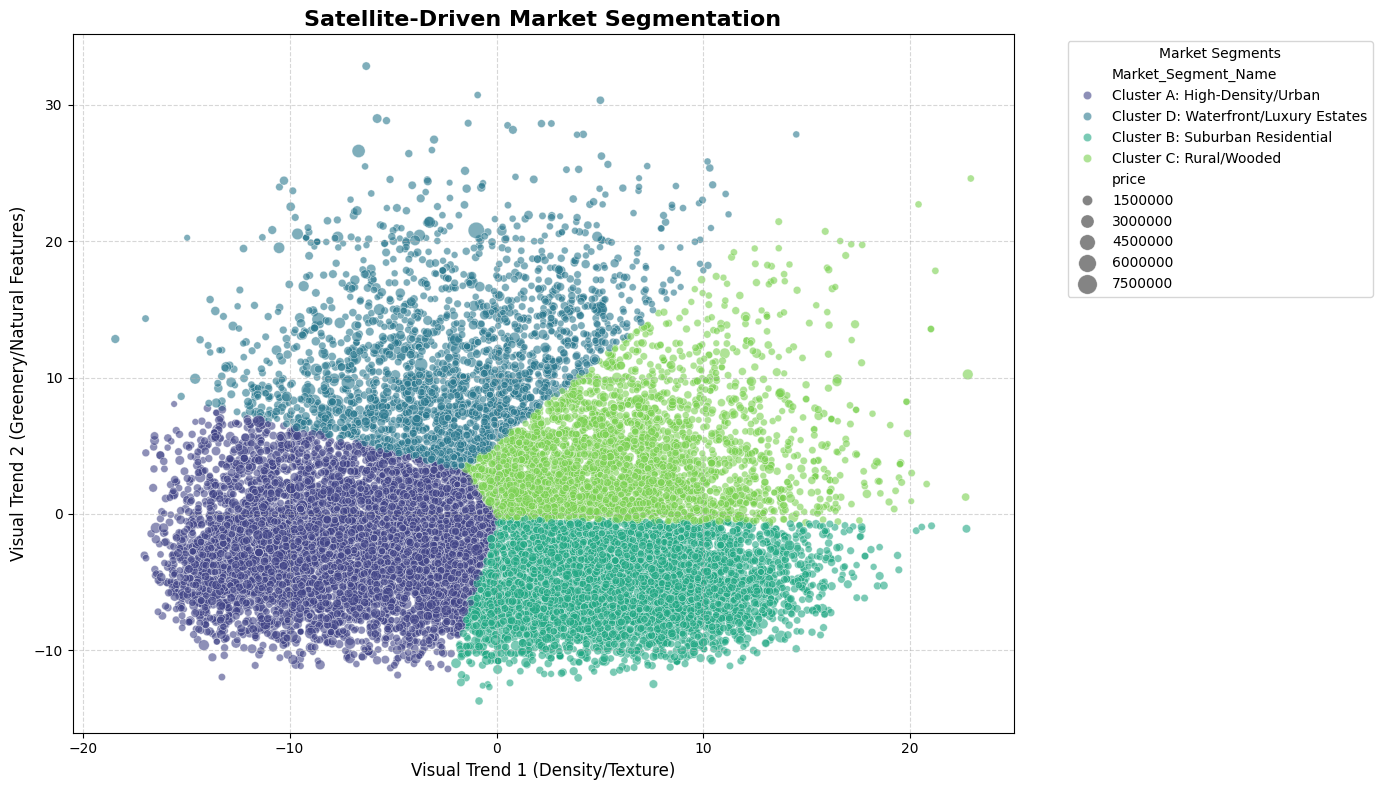

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 1. Map the Cluster IDs to descriptive names
segment_names = {
    0: "Cluster A: High-Density/Urban",
    1: "Cluster B: Suburban Residential",
    2: "Cluster C: Rural/Wooded",
    3: "Cluster D: Waterfront/Luxury Estates"
}

# Apply the mapping to the dataframe column
df_res_train['Market_Segment_Name'] = df_res_train['Market_Segment'].map(segment_names)

# 2. Plotting
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    x='Visual_PCA1',
    y='Visual_PCA2',
    hue='Market_Segment_Name', # Use the new named column here
    size='price',
    palette='viridis',
    data=df_res_train,
    alpha=0.6,
    sizes=(20, 200) # Adjusts the scale of the price bubbles
)

# 3. Formatting
plt.title("Satellite-Driven Market Segmentation", fontsize=16, fontweight='bold')
plt.xlabel("Visual Trend 1 (Density/Texture)", fontsize=12)
plt.ylabel("Visual Trend 2 (Greenery/Natural Features)", fontsize=12)

# Move legend outside and ensure it shows the names
plt.legend(title="Market Segments", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

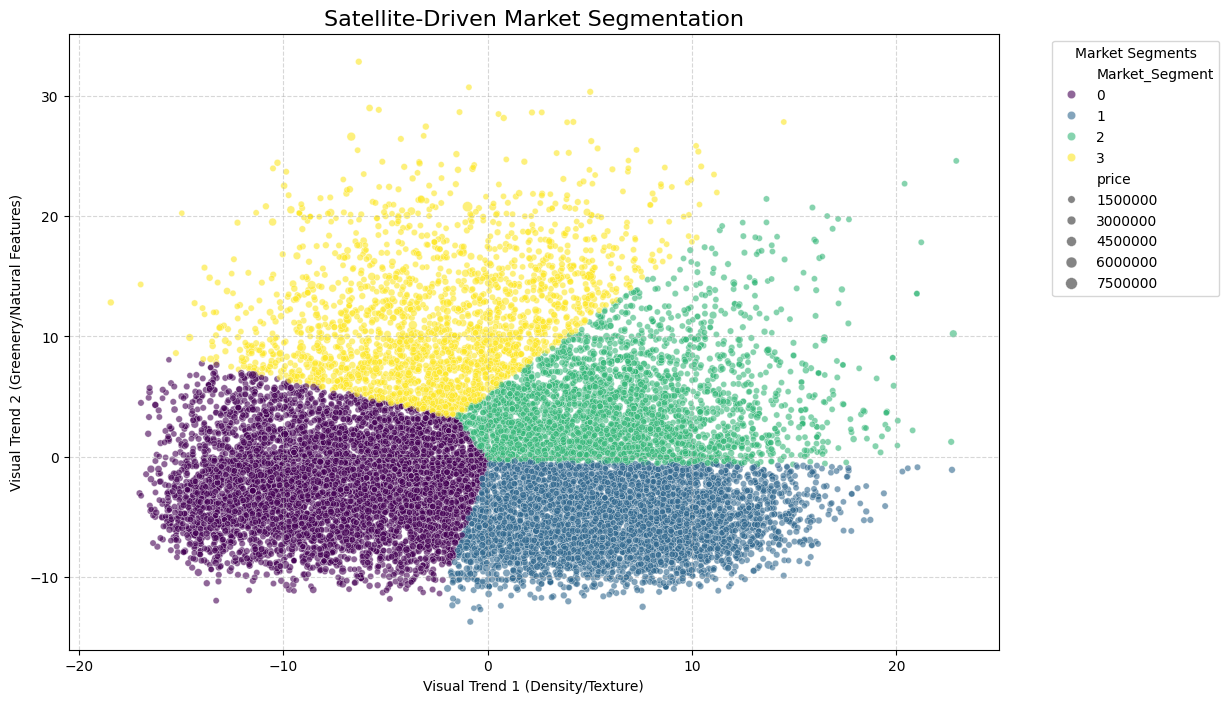

In [25]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='Visual_PCA1', y='Visual_PCA2',
    hue='Market_Segment', size='price',
    palette='viridis', data=df_res_train, alpha=0.6
)

plt.title("Satellite-Driven Market Segmentation", fontsize=16)
plt.xlabel("Visual Trend 1 (Density/Texture)")
plt.ylabel("Visual Trend 2 (Greenery/Natural Features)")
plt.legend(title="Market Segments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [27]:

business_summary = df_res_train.groupby('Market_Segment').agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'grade': 'mean',
    'yr_built': 'mean',
    'id': 'count'
}).rename(columns={'id': 'Total_Properties', 'price': 'Avg_Market_Value'})

# Format for presentation
business_summary['Avg_Market_Value'] = business_summary['Avg_Market_Value'].map('${:,.0f}'.format)
business_summary['Avg_Sqft'] = business_summary['sqft_living'].astype(int)

print("--- STRATEGIC MARKET SEGMENTATION REPORT ---")
display(business_summary.drop(columns=['sqft_living']))

--- STRATEGIC MARKET SEGMENTATION REPORT ---


,Avg_Market_Value,grade,yr_built,Total_Properties,Avg_Sqft
Market_Segment,,,,,
0,"$590,335",0.223463,0.136347,6069,0
1,"$523,219",-0.289224,-0.516110,4900,0
2,"$451,350",-0.144908,0.210214,3170,0
3,"$538,485",0.183015,0.418696,2268,0


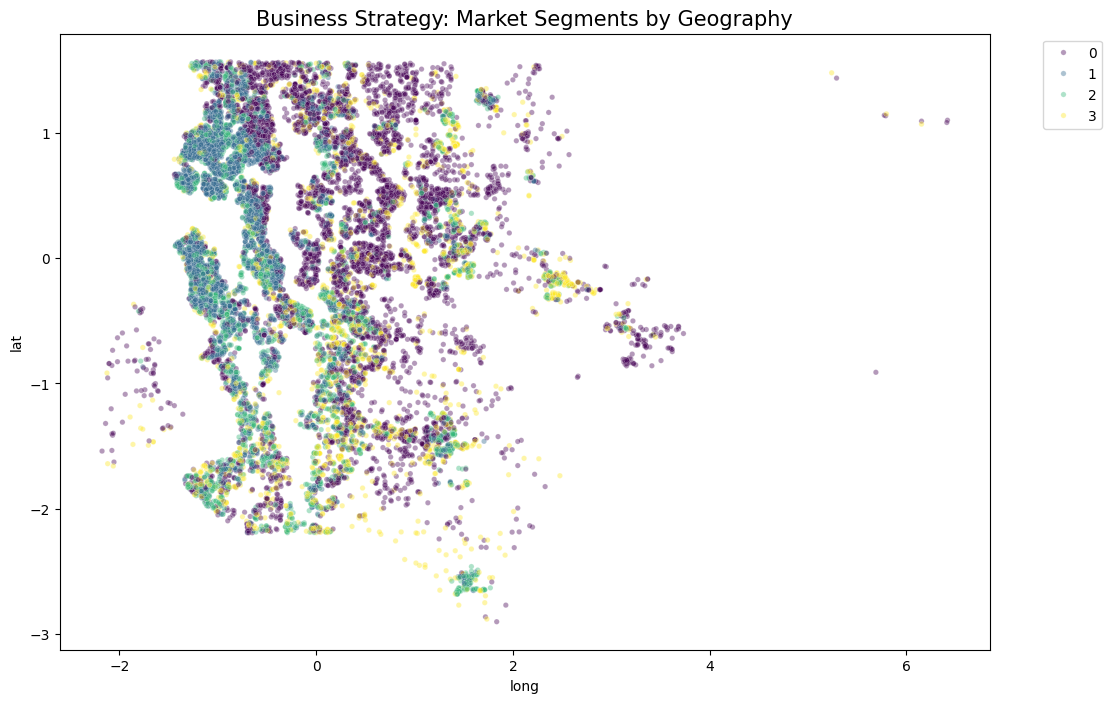

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='long', y='lat',
    hue='Market_Segment',
    palette='viridis',
    data=df_res_train,
    alpha=0.4, s=15
)
plt.title("Business Strategy: Market Segments by Geography", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-3722903846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Market_Segment', y='grade', data=df_res_train, palette='magma')


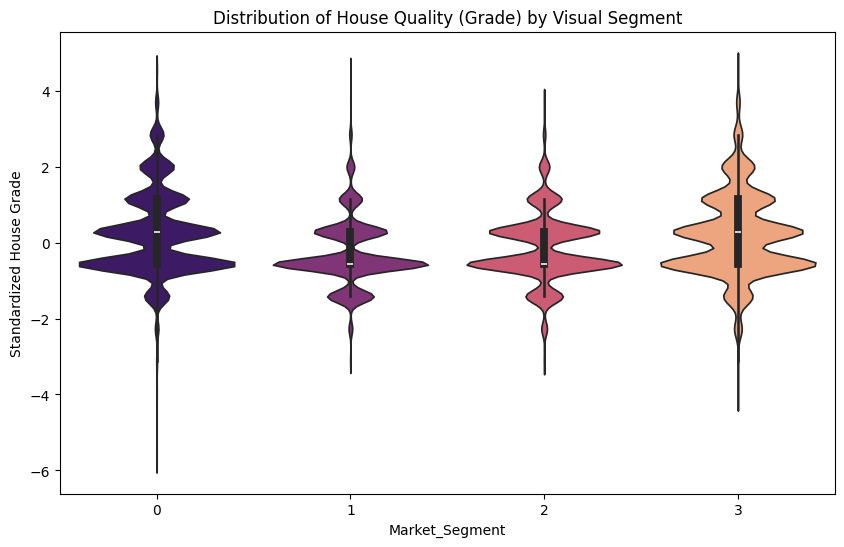

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Market_Segment', y='grade', data=df_res_train, palette='magma')
plt.title("Distribution of House Quality (Grade) by Visual Segment")
plt.ylabel("Standardized House Grade")
plt.show()

In [31]:
import numpy as np

# 1. Calculate the center of each cluster
centroids = kmeans.cluster_centers_

# 2. Function to find top N closest houses to the centroid
def get_archetypes(cluster_id, num_houses=3):
    # Get indices of houses in this cluster
    mask = df_res_train['Market_Segment'] == cluster_id
    cluster_indices = df_res_train[mask].index

    # Get the PCA coordinates for houses in this cluster
    # We use the 2D results since that's what we plotted
    coords = pca_result[mask]

    # Calculate distance to centroid
    dist = np.linalg.norm(coords - centroids[cluster_id], axis=1)

    # Get the top N closest
    closest_indices = cluster_indices[np.argsort(dist)[:num_houses]]
    return df_res_train.loc[closest_indices, ['id', 'price', 'grade']]

# 3. Create a dictionary of archetypes for all clusters
archetypes = {i: get_archetypes(i) for i in range(4)}

for cluster, houses in archetypes.items():
    print(f"\n--- {segment_names[cluster]} ---")
    print(houses)


--- Cluster A: High-Density/Urban ---
               id   price     grade
14833  2549000020  400000  0.296350
7986   5535600110  515500  1.150311
5870   7936800150  394500  0.296350

--- Cluster B: Suburban Residential ---
               id   price     grade
6632   3332000615  389000 -1.411573
14648   458000065  542000 -0.557611
6523   1972201161  435000 -1.411573

--- Cluster C: Rural/Wooded ---
               id   price     grade
14287  7331900290  230000 -0.557611
9967   3791400250  420000  1.150311
7262   6929603769  253000 -0.557611

--- Cluster D: Waterfront/Luxury Estates ---
               id   price     grade
15617  9510860750  918000  1.150311
5402   3798000165  444950 -0.557611
1606   1085623640  428900  1.150311


**Important Features**

<Figure size 1000x800 with 0 Axes>

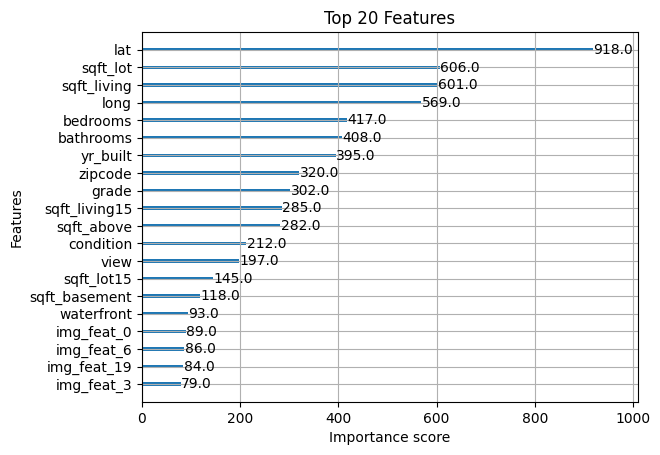

In [35]:
import matplotlib.pyplot as plt

# Get feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20, importance_type='weight')
plt.title("Top 20 Features")
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [ ]:
tabular_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' , 'date']
image_cols = [f'img_feat_{i}' for i in range(512)]

--- Feature Importance Breakdown ---
 Tabular Stats: 27.64%
Satellite Images: 72.36%


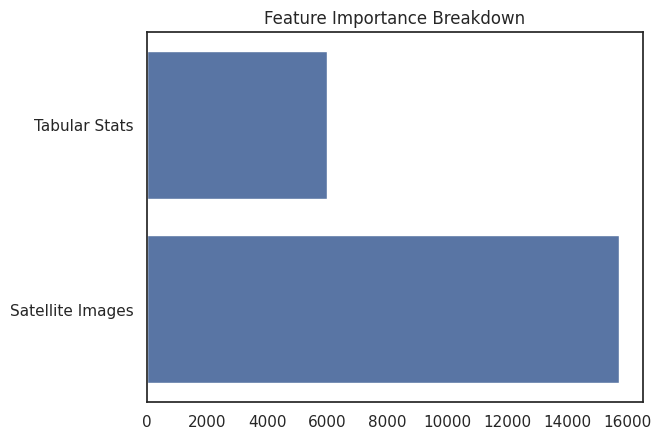

In [ ]:
# Get importance scores
importance = model.get_booster().get_score(importance_type='weight')

# Separate importance by type
tabular_importance = sum([v for k, v in importance.items() if k in tabular_cols])
image_importance = sum([v for k, v in importance.items() if k in image_cols])

total = tabular_importance + image_importance
print(f"--- Feature Importance Breakdown ---")
print(f" Tabular Stats: {(tabular_importance/total)*100:.2f}%")
print(f"Satellite Images: {(image_importance/total)*100:.2f}%")

#plot with percentage above

tabular_importance = sum([v for k, v in importance.items() if k in tabular_cols])
image_importance = sum([v for k, v in importance.items() if k in image_cols])


sns.barplot(x=[tabular_importance, image_importance], y=['Tabular Stats', 'Satellite Images'])

plt.title("Feature Importance Breakdown")
plt.show()





In [ ]:
import cv2
import torch
from torchvision import models, transforms

In [ ]:
resnet_model = models.resnet18(pretrained=True)
resnet_model.fc = torch.nn.Identity() # Match your extraction setup
resnet_model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

**Model 2**

In [ ]:
df_images= "/content/drive/MyDrive/House_Price_Project_Final/images/satellite_images"

In [ ]:
semantic_feat= pd.read_csv("/content/drive/MyDrive/House_Price_Project_Final/features/combined_data_final_semantic.csv")

In [ ]:
semantic_feat.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511,green_score,concrete_score
0,9117000170,2015,268643,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,...,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000,0.321976,0.326859
1,6700390210,2014,245000,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,...,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116,0.305252,0.425995
2,7212660540,2015,200000,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,...,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635,0.194504,0.454315
3,8562780200,2015,352499,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,...,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145,0.189957,0.351501
4,7760400350,2014,232000,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,...,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330,0.243271,0.393982


In [ ]:

semantic_cols_to_keep = ['id', 'green_score', 'concrete_score']

# Merge only those specific columns
df_semantic_train = df_res_train.merge(semantic_feat[semantic_cols_to_keep], on='id', how='inner')

In [ ]:
df_semantic_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511,green_score,concrete_score
0,9117000170,2015-05-05,268643,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,...,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000,0.321976,0.326859
1,6700390210,2014-07-08,245000,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,...,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116,0.305252,0.425995
2,7212660540,2015-01-15,200000,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,...,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635,0.194504,0.454315
3,8562780200,2015-04-27,352499,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,...,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145,0.189957,0.351501
4,7760400350,2014-12-05,232000,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,...,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330,0.243271,0.393982


In [ ]:
x_semantic = df_semantic_train.drop(['id', 'date', 'price', 'log_price'], axis=1)
y_semantic = df_semantic_train['log_price']

In [ ]:
x_train_semantic , x_val_semantic, y_train_semantic, y_val_semantic = train_test_split(x_semantic, y_semantic, test_size=0.2, random_state=42)



In [ ]:
model_semantic = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50,
    n_jobs=-1,
    random_state=42
)


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fit the model
model_semantic.fit(
    x_train_semantic, y_train_semantic,
    eval_set=[(x_val_semantic, y_val_semantic)],
    verbose=False
)

# 1. Get predictions in log space
preds_log = model_semantic.predict(x_val_semantic)

# 2. Calculate R2 in LOG SPACE (This tells you how well the model learned patterns)
r2_log = r2_score(y_val_semantic, preds_log)

# 3. Convert to DOLLARS for the MAE (This tells you the price error)
actual_prices = np.expm1(y_val_semantic)
predicted_prices = np.expm1(preds_log)
mae_dollars = mean_absolute_error(actual_prices, predicted_prices)

rmse_dollars = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f" RMSE: ${rmse_dollars:,.2f}")


print(f" Semantic-Boosted Model Evaluation")
print(f" R² Score (Log-Space): {r2_log:.4f}  <-- Use THIS for your accuracy report")
print(f" Mean Absolute Error: ${mae_dollars:,.2f} <-- Use THIS for the business error")

# Calculate Percentage Error
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

print(f"MAPE: {mape:.2f}%")

 RMSE: $117,097.25
 Semantic-Boosted Model Evaluation
 R² Score (Log-Space): 0.8894  <-- Use THIS for your accuracy report
 Mean Absolute Error: $67,865.79 <-- Use THIS for the business error
MAPE: 13.30%


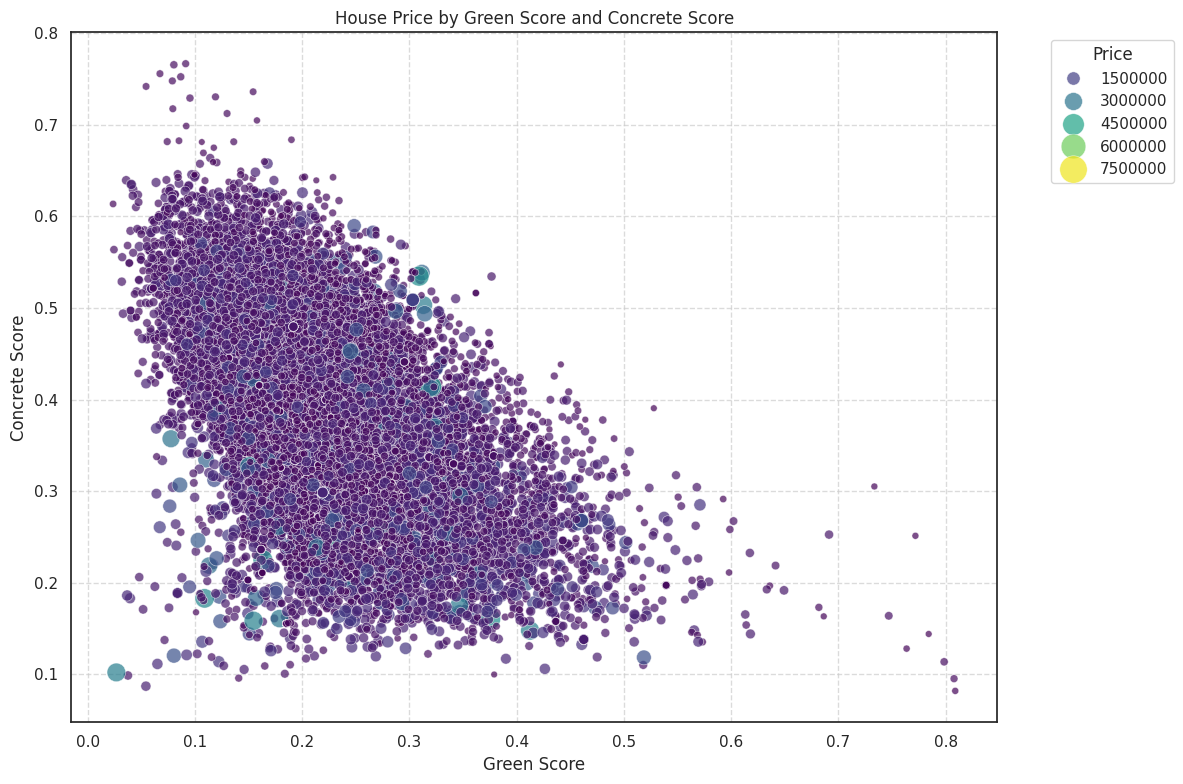

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_semantic_train, x='green_score', y='concrete_score', hue='price', palette='viridis', size='price', sizes=(20, 400), alpha=0.7)
plt.title('House Price by Green Score and Concrete Score')
plt.xlabel('Green Score')
plt.ylabel('Concrete Score')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Model 1:
R2 (log): 0.8903843635266155
MAE ($): 70695.04084780622
RMSE ($): 144548.97153256356
MAPE (%): 12.894599213343074


Text(0.5, 1.0, 'Actual vs. Predicted House Prices')

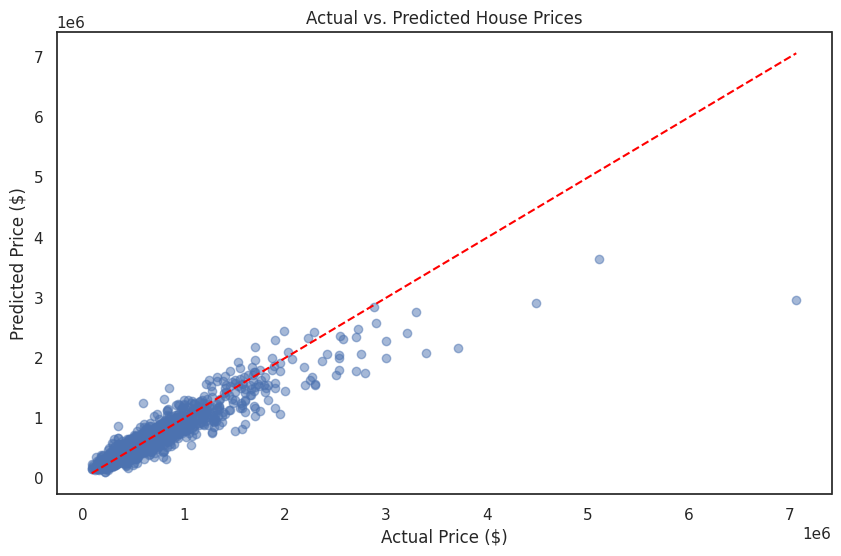

In [ ]:
preds_log = model.predict(x_val_res)

actual_prices = np.expm1(y_val_res)
predicted_prices = np.expm1(preds_log)

mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

print("Model 1:")
print("R2 (log):", r2_score(y_val_res, preds_log))
print("MAE ($):", mae)
print("RMSE ($):", rmse)
print("MAPE (%):", mape)

#scatterplot for acutal vs pedicted price with line
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], color='red', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs. Predicted House Prices')



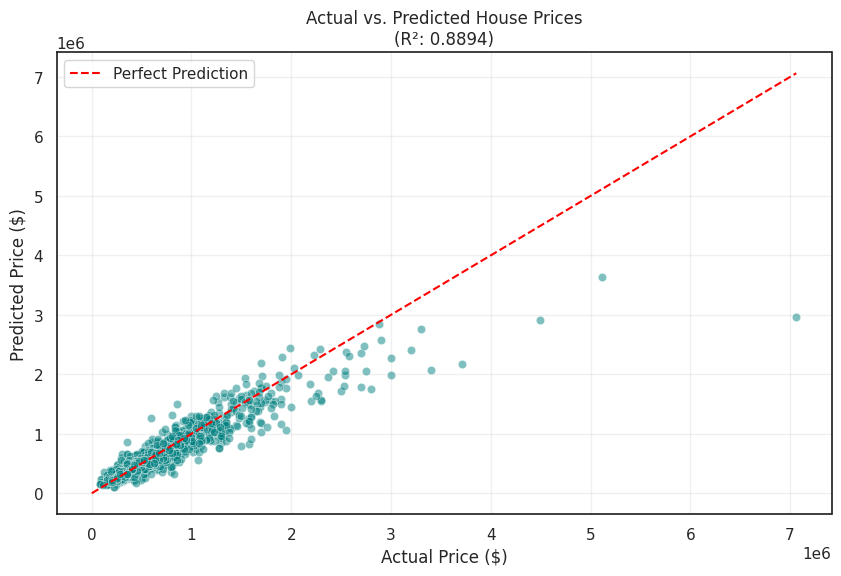

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_prices, y=predicted_prices, alpha=0.5, color='teal')

# Add the "Perfect Prediction" line
max_val = max(actual_prices.max(), predicted_prices.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'Actual vs. Predicted House Prices\n(R²: {r2_log:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x800 with 0 Axes>

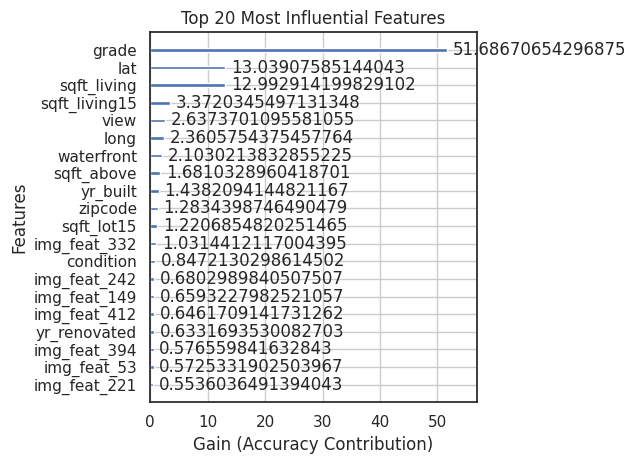

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 1. Get the top 20 features by Gain
# 'Gain' is the average improvement in accuracy brought by a feature
plt.figure(figsize=(10, 8))
xgb.plot_importance(model_semantic,
                    max_num_features=20,
                    importance_type='gain',
                    xlabel='Gain (Accuracy Contribution)',
                    title='Top 20 Most Influential Features')

plt.tight_layout()
plt.show()

**Model 3**

In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Concatenate, BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [22]:
df_full = df.merge(features_resnet, on="id", how="inner")


In [23]:
TARGET = "price"

numeric_cols = [
    'bedrooms','bathrooms','sqft_living','sqft_lot','floors',
    'waterfront','view','condition','grade','sqft_above',
    'sqft_basement','yr_built','yr_renovated','zipcode',
    'lat','long','sqft_living15','sqft_lot15'
]

image_cols = [c for c in features_resnet.columns if c != "id"]

X_tab = df_full[numeric_cols]
X_img = df_full[image_cols]


y = np.log(df_full[TARGET])


In [24]:
X_tab_tr, X_tab_val, X_img_tr, X_img_val, y_tr, y_val = train_test_split(
    X_tab, X_img, y, test_size=0.2, random_state=42
)


In [25]:
scaler = StandardScaler()

X_tab_tr = scaler.fit_transform(X_tab_tr)
X_tab_val = scaler.transform(X_tab_val)


In [26]:
# Tabular branch
tab_input = Input(shape=(X_tab_tr.shape[1],), name="tabular_input")
x_tab = Dense(128, activation="relu")(tab_input)
x_tab = BatchNormalization()(x_tab)
x_tab = Dropout(0.3)(x_tab)
x_tab = Dense(64, activation="relu")(x_tab)

# Image branch (ResNet features)
img_input = Input(shape=(X_img_tr.shape[1],), name="image_input")
x_img = Dense(256, activation="relu")(img_input)
x_img = BatchNormalization()(x_img)
x_img = Dropout(0.3)(x_img)

# Fusion
fusion = Concatenate()([x_tab, x_img])
fusion = Dense(128, activation="relu")(fusion)
fusion = Dropout(0.3)(fusion)

output = Dense(1, name="log_price")(fusion)

model = Model(inputs=[tab_input, img_input], outputs=output)


In [27]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="mse"
)

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(
    [X_tab_tr, X_img_tr],
    y_tr,
    validation_data=([X_tab_val, X_img_val], y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 27.7240 - val_loss: 16.3923
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.4404 - val_loss: 2.2432
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6383 - val_loss: 0.8508
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2164 - val_loss: 0.3805
Epoch 5/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9300 - val_loss: 1.1675
Epoch 6/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7482 - val_loss: 0.6840
Epoch 7/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7138 - val_loss: 0.6147
Epoch 8/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5702 - val_loss: 0.5764
Epoch 9/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5252 - val_loss: 0.2286
Epoch 10/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4635 - val_loss: 0.6420
Epoch 11/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3839 - val_loss: 0.4869
Epoch 12/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

In [28]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="mse"
)

model.fit(
    [X_tab_tr, X_img_tr],
    y_tr,
    validation_data=([X_tab_val, X_img_val], y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 1.2536 - val_loss: 0.1868
Epoch 2/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1923 - val_loss: 0.2817
Epoch 3/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1513 - val_loss: 0.3649
Epoch 4/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1748 - val_loss: 0.1838
Epoch 5/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1602 - val_loss: 0.3014
Epoch 6/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1288 - val_loss: 0.3249
Epoch 7/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1381 - val_loss: 0.1907
Epoch 8/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1508 - val_loss: 0.2672
Epoch 9/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1792 - val_loss: 0.2278
Epoch 10/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1296 - val_loss: 0.2474
Epoch 11/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1265 - val_loss: 0.3143
Epoch 12/30
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

In [29]:
log_preds = model.predict([X_tab_val, X_img_val]).ravel()


preds = np.exp(log_preds)
y_true = np.exp(y_val)

print("Multimodal R2:", r2_score(y_true, preds))
print("Multimodal RMSE:", np.sqrt(mean_squared_error(y_true, preds)))


103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Multimodal R2: 0.4391214062707619
Multimodal RMSE: 292136.7339483974
